In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.decomposition import PCA

In [26]:
dataset = pd.read_csv('../dataset/online_shoppers_intention.csv')
dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Rad sa nedostajućim vrednostima

In [27]:
dataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [28]:
# Vidimo da nema nedostajucih vrednosti

In [29]:
dataset.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [30]:
# dataset_copy = dataset
# dataset_copy = dataset_copy.drop(columns=['Month', 'VisitorType'])

### Matrica korelacije pomoću heatmap

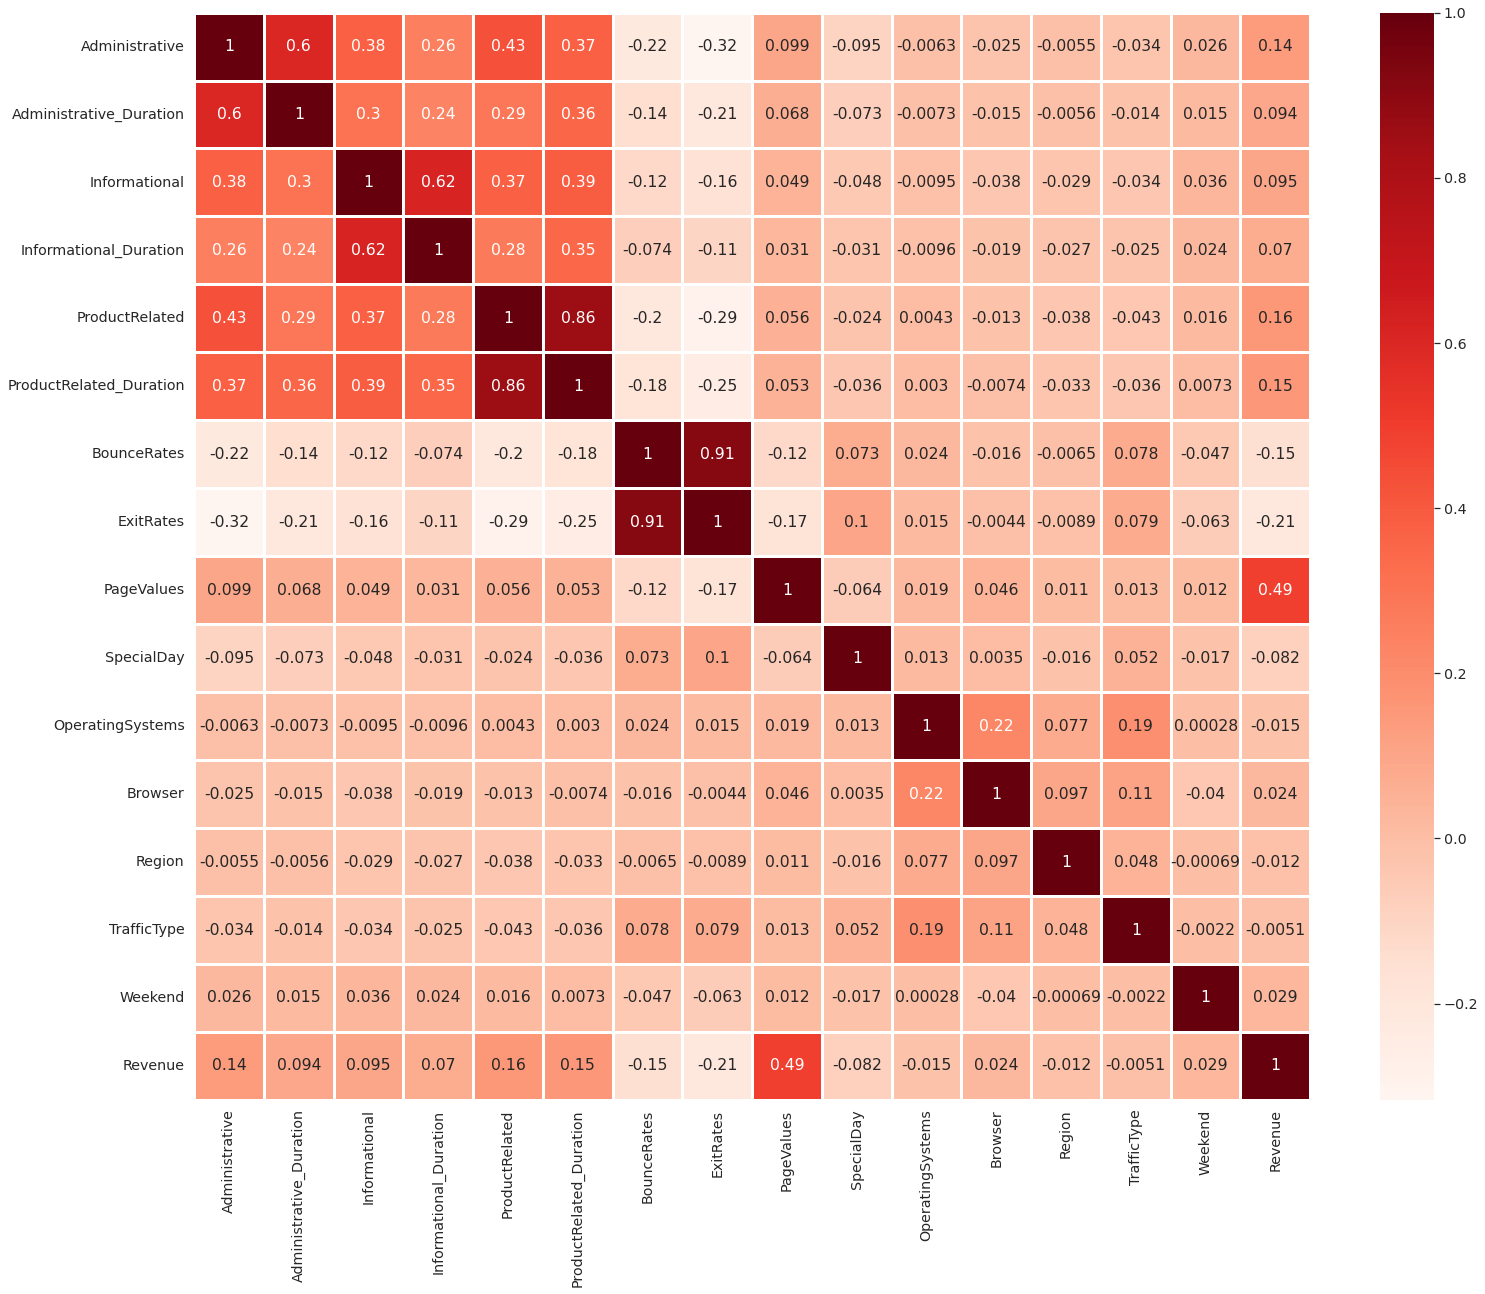

In [31]:
plt.figure(figsize = (25,20))
sns.set(font_scale = 1.3)
corr_matrix = dataset.corr(numeric_only=True)
hm=sns.heatmap(corr_matrix, cmap = plt.cm.Reds, annot=True, linewidths=3)

### Vidimo na mapi atribute sa visokom korelacijom i izbacujemo ih

In [32]:
# To su atributi ProductRelated i ProductRelated Duration (0.86)
# I atributi BounceRates i ExitRates (0.91)

dataset = dataset.drop(columns=['ProductRelated', 'BounceRates'])

### Transformisanje kategoričkih atributa

In [33]:
new_dataset = pd.get_dummies(dataset, columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'])

In [34]:
revenue = dataset['Revenue'].unique()
num_class = revenue.shape[0]
zipped = zip(revenue, range(num_class))
dictionary = dict(zipped)

new_dataset = new_dataset.replace(dictionary)
new_dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,64.000000,0.100000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2.666667,0.140000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,627.500000,0.050000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,1783.791667,0.029031,12.241717,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12326,0,0.0,0,0.0,465.750000,0.021333,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12327,0,0.0,0,0.0,184.250000,0.086667,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12328,4,75.0,0,0.0,346.000000,0.021053,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [35]:
print('Spisak novih atributa:\n', new_dataset.columns.values)

Spisak novih atributa:
 ['Administrative' 'Administrative_Duration' 'Informational'
 'Informational_Duration' 'ProductRelated_Duration' 'ExitRates'
 'PageValues' 'SpecialDay' 'Revenue' 'Month_Aug' 'Month_Dec' 'Month_Feb'
 'Month_Jul' 'Month_June' 'Month_Mar' 'Month_May' 'Month_Nov' 'Month_Oct'
 'Month_Sep' 'OperatingSystems_1' 'OperatingSystems_2'
 'OperatingSystems_3' 'OperatingSystems_4' 'OperatingSystems_5'
 'OperatingSystems_6' 'OperatingSystems_7' 'OperatingSystems_8'
 'Browser_1' 'Browser_2' 'Browser_3' 'Browser_4' 'Browser_5' 'Browser_6'
 'Browser_7' 'Browser_8' 'Browser_9' 'Browser_10' 'Browser_11'
 'Browser_12' 'Browser_13' 'Region_1' 'Region_2' 'Region_3' 'Region_4'
 'Region_5' 'Region_6' 'Region_7' 'Region_8' 'Region_9' 'TrafficType_1'
 'TrafficType_2' 'TrafficType_3' 'TrafficType_4' 'TrafficType_5'
 'TrafficType_6' 'TrafficType_7' 'TrafficType_8' 'TrafficType_9'
 'TrafficType_10' 'TrafficType_11' 'TrafficType_12' 'TrafficType_13'
 'TrafficType_14' 'TrafficType_15' 'TrafficT

### Razdvajamo atribut Revanue od ostalih

In [36]:
X = new_dataset.drop(columns=['Revenue'])

In [37]:
y = new_dataset['Revenue']

### Standardizacija

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.3, stratify = y)
X_train_original = pd.DataFrame(X_train, columns = X.columns)

stand = StandardScaler()

X_train_scaled = stand.fit_transform(X_train)
X_test_scaled = stand.transform(X_test)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_train_scaled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.702051,-0.466899,-0.392287,-0.242548,-0.371213,-0.313775,-0.325781,-0.307289,-0.19654,2.468204,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,2.500588,-0.082963,-2.431117,0.547764,-0.547764
1,0.213912,0.122973,-0.392287,-0.242548,-0.541807,0.051712,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604
2,-0.396730,-0.355845,-0.392287,-0.242548,-0.473883,-0.061067,-0.325781,-0.307289,-0.19654,2.468204,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
3,-0.702051,-0.466899,0.392559,-0.174055,0.616553,-0.257464,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
4,-0.091409,-0.373380,-0.392287,-0.242548,-0.197565,-0.373260,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,0.519234,-0.221411,0.392559,-0.047341,0.090013,-0.847571,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
8627,-0.702051,-0.466899,-0.392287,-0.242548,-0.547615,0.145694,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
8628,-0.702051,-0.466899,-0.392287,-0.242548,-0.625605,1.179500,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
8629,0.213912,-0.146596,0.392559,-0.049396,-0.523339,-0.722703,2.099456,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764


In [40]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_scaled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.396730,-0.437674,-0.392287,-0.242548,0.259200,-0.547077,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604
1,-0.702051,-0.466899,-0.392287,-0.242548,-0.235256,-0.543510,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
2,-0.091409,0.252030,-0.392287,-0.242548,-0.504403,-0.629661,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,2.500588,-0.082963,-2.431117,-1.825604,1.825604
3,-0.091409,-0.396759,-0.392287,-0.242548,-0.361596,-0.149679,-0.325781,4.752247,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604
4,-0.702051,-0.466899,1.962251,0.058825,0.010633,0.625899,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,-0.702051,-0.466899,-0.392287,-0.242548,-0.630348,3.247113,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
3695,-0.702051,-0.466899,-0.392287,-0.242548,-0.262966,-0.543510,-0.325781,2.728433,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764
3696,-0.702051,-0.466899,-0.392287,-0.242548,-0.385489,-0.183244,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604
3697,0.519234,0.114673,-0.392287,-0.242548,-0.128114,-0.592739,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.015224,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604


### Prikaz pre i posle standardizacije

[Text(0.5, 0, ''), Text(0, 0.5, '')]

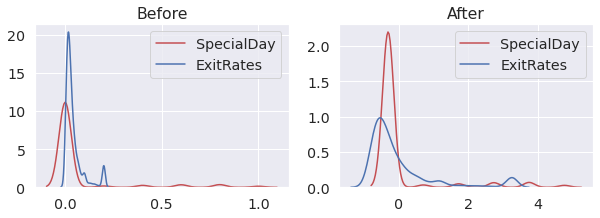

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.rcParams["figure.figsize"] = [10, 3]

sns.kdeplot(X_train_original['SpecialDay'], ax=ax1, label='SpecialDay', color='r')
sns.kdeplot(X_train_original['ExitRates'], ax=ax1, label='ExitRates', color='b')
ax1.set_title('Before')
ax1.legend(loc="upper right")
ax1.set(xlabel=None, ylabel=None)

sns.kdeplot(X_train_scaled['SpecialDay'], ax=ax2, label='SpecialDay', color='r')
sns.kdeplot(X_train_scaled['ExitRates'], ax=ax2, label='ExitRates', color='b')
ax2.set_title('After')
ax2.legend(loc="upper right")
ax2.set(xlabel=None, ylabel=None)

### Korišćenje SMOTE algoritma za balansiranje klasa

<BarContainer object of 2 artists>

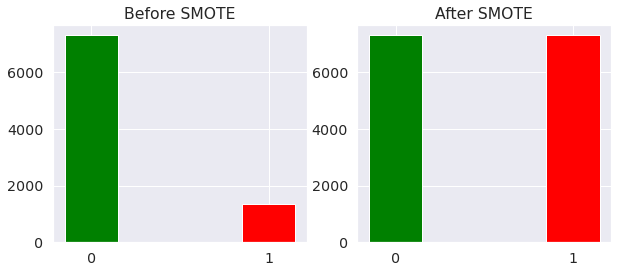

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.set_title('Before SMOTE')
ax1.bar(['0','1'], [sum(y_train == 0), sum(y_train == 1)], width = 0.3, color = ['green', 'red'])

oversample = SMOTE(random_state = 2, sampling_strategy = 'minority')
X_train_smote, y_train = oversample.fit_resample(X_train_scaled, y_train.ravel())

ax2.set_title('After SMOTE')
ax2.bar(['0','1'], [sum(y_train == 0), sum(y_train == 1)], width = 0.3, color = ['green', 'red'])

### Korišćenje PCA algoritma (95%) za umanjenje dimenzionalnosti

In [43]:
X_train_smote = pd.DataFrame(X_train_smote, columns = X.columns)
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)

### Prikaz važnosti atributa pomoću XGBoost algoritma

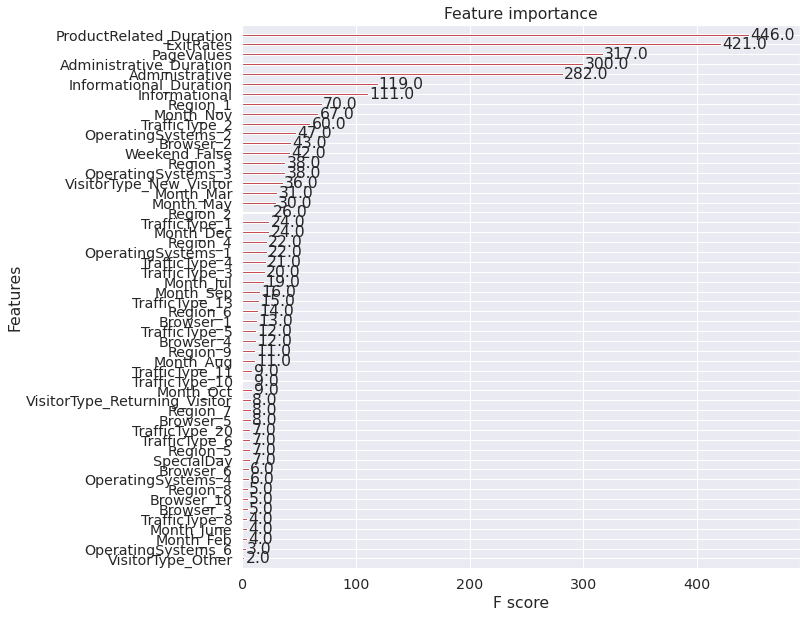

In [44]:
classifier = xgb.XGBClassifier()
classifier.fit(X_train_smote, y_train)
ax=xgb.plot_importance(classifier, title = 'Feature importance', xlabel = 'F score', ylabel = 'Features', color='r')
fig = ax.figure
fig.set_size_inches(10,10)

### Spajanje skupa atributa u novi preprocesirani skup

In [45]:
X1 = pd.concat([X_train_smote, X_test_scaled])
y_train_df = pd.DataFrame(y_train, columns=['Revenue'])

y_test_df = pd.DataFrame(y_test)
y1 = pd.concat([y_train_df, y_test_df])

X1 = X1.loc[~X1.index.duplicated(keep='first')]
y1 = y1.loc[~y1.index.duplicated(keep='first')]

In [46]:
concatenated = pd.concat([X1, y1], axis=1)
concatenated.to_csv('preprocessed.csv', index=False)

In [47]:
pp = pd.read_csv('preprocessed.csv')
pp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,...,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue
0,-0.702051,-0.466899,-0.392287,-0.242548,-0.371213,-0.313775,-0.325781,-0.307289,-0.19654,2.468204,...,-0.010765,-0.024076,-0.038839,-0.133441,2.500588,-0.082963,-2.431117,0.547764,-0.547764,0
1,0.213912,0.122973,-0.392287,-0.242548,-0.541807,0.051712,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,-1.825604,1.825604,0
2,-0.396730,-0.355845,-0.392287,-0.242548,-0.473883,-0.061067,-0.325781,-0.307289,-0.19654,2.468204,...,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764,0
3,-0.702051,-0.466899,0.392559,-0.174055,0.616553,-0.257464,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764,0
4,-0.091409,-0.373380,-0.392287,-0.242548,-0.197565,-0.373260,-0.325781,-0.307289,-0.19654,-0.405153,...,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,-0.702051,-0.466899,0.344205,1.667675,-0.430419,-0.001525,0.611543,-0.307289,-0.19654,-0.405153,...,-0.010765,-0.024076,-0.038839,7.493927,-0.399906,-0.082963,0.411334,0.547764,-0.547764,1
14586,-0.702051,-0.466899,-0.392287,-0.242548,0.003730,-0.781035,3.260977,-0.307289,-0.19654,1.882773,...,-0.010765,-0.024076,-0.038839,-0.133441,2.500588,-0.082963,-2.431117,0.547764,-0.547764,1
14587,0.440652,-0.379685,2.388341,0.924938,2.328422,-0.487900,-0.066836,-0.307289,-0.19654,-0.405153,...,-0.010765,-0.024076,-0.038839,-0.133441,-0.399906,-0.082963,0.411334,0.547764,-0.547764,1
14588,0.796893,-0.180459,-0.392287,-0.242548,-0.021306,-0.590174,0.637547,-0.307289,-0.19654,-0.405153,...,-0.010765,-0.024076,-0.038839,-0.133441,0.466347,-0.082963,-0.437585,-1.116781,1.116781,1
